In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
from training import Coach
from utils import MnistData
from models import ModelManager, ModelType

In [ ]:
data = MnistData()

In [19]:
simple, momentum, nesterov = [], [], []

In [20]:
for i in range(100):
    print(f'--- ({i}) ---')
    model = ModelManager.get_untrained(ModelType.MnistMlpA)
    Coach.train(
        model,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(model.parameters(), lr=1e-2),
        30,
        5001,
        5000
    )
    simple.append(Coach.measure_performance(model, data))

--- (0) ---
Training started at 1645295750.7229416
Epoch 0: 69.1086654663086
Epoch 5000: 49.86396026611328
Training finished at 1645295764.0311227; lasted 13.308181047439575 seconds.
75.42 % success on test data
--- (1) ---
Training started at 1645295764.8036966
Epoch 0: 68.90376281738281
Epoch 5000: 55.62004089355469
Training finished at 1645295778.439367; lasted 13.63567042350769 seconds.
74.58 % success on test data
--- (2) ---
Training started at 1645295779.2758245
Epoch 0: 68.87562561035156
Epoch 5000: 45.17998123168945
Training finished at 1645295792.6580284; lasted 13.382203817367554 seconds.
82.8 % success on test data
--- (3) ---
Training started at 1645295793.40925
Epoch 0: 69.1299057006836
Epoch 5000: 50.61477279663086
Training finished at 1645295806.745839; lasted 13.336589097976685 seconds.
74.91 % success on test data
--- (4) ---
Training started at 1645295807.5339682
Epoch 0: 69.10343933105469
Epoch 5000: 52.791473388671875
Training finished at 1645295820.825638; lasted 

In [21]:
for i in range(100):
    print(f'--- ({i}) ---')
    model = ModelManager.get_untrained(ModelType.MnistMlpA)
    Coach.train(
        model,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(model.parameters(), lr=1e-3, momentum=0.9),
        30,
        5001,
        5000
    )
    momentum.append(Coach.measure_performance(model, data))

--- (0) ---
Training started at 1645297145.8446007
Epoch 0: 68.92023468017578
Epoch 5000: 48.791236877441406
Training finished at 1645297159.6215954; lasted 13.776994705200195 seconds.
81.02000000000001 % success on test data
--- (1) ---
Training started at 1645297160.4203215
Epoch 0: 68.92704772949219
Epoch 5000: 50.83723831176758
Training finished at 1645297174.2703202; lasted 13.849998712539673 seconds.
74.71 % success on test data
--- (2) ---
Training started at 1645297175.0350146
Epoch 0: 69.14725494384766
Epoch 5000: 53.84695053100586
Training finished at 1645297188.8843088; lasted 13.849294185638428 seconds.
73.3 % success on test data
--- (3) ---
Training started at 1645297189.6995108
Epoch 0: 69.1396255493164
Epoch 5000: 47.883331298828125
Training finished at 1645297204.3743222; lasted 14.674811363220215 seconds.
74.53 % success on test data
--- (4) ---
Training started at 1645297205.1169796
Epoch 0: 69.25444030761719
Epoch 5000: 50.89012145996094
Training finished at 1645297

In [22]:
for i in range(100):
    print(f'--- ({i}) ---')
    model = ModelManager.get_untrained(ModelType.MnistMlpA)
    Coach.train(
        model,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True),
        30,
        5001,
        5000
    )
    nesterov.append(Coach.measure_performance(model, data))

--- (0) ---
Training started at 1645298596.3492968
Epoch 0: 68.99169921875
Epoch 5000: 49.86095428466797
Training finished at 1645298610.9449885; lasted 14.595691680908203 seconds.
82.75 % success on test data
--- (1) ---
Training started at 1645298611.7291648
Epoch 0: 69.10367584228516
Epoch 5000: 49.93589401245117
Training finished at 1645298625.8181698; lasted 14.08900499343872 seconds.
81.78999999999999 % success on test data
--- (2) ---
Training started at 1645298626.597917
Epoch 0: 69.05573272705078
Epoch 5000: 51.17592239379883
Training finished at 1645298640.5898578; lasted 13.99194073677063 seconds.
76.19 % success on test data
--- (3) ---
Training started at 1645298641.3393078
Epoch 0: 69.07157897949219
Epoch 5000: 53.610145568847656
Training finished at 1645298655.3817902; lasted 14.042482376098633 seconds.
73.27 % success on test data
--- (4) ---
Training started at 1645298656.1881585
Epoch 0: 69.30464935302734
Epoch 5000: 47.83452606201172
Training finished at 1645298670.1

In [ ]:
import matplotlib.pylab as lab

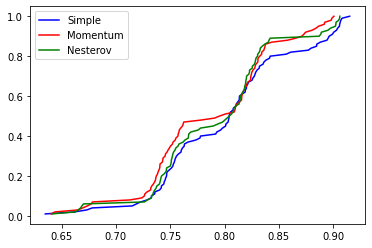

In [29]:
# for performences in [sorted(simple), sorted(momentum), sorted(nesterov)]:
performences = sorted(simple)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "blue", label="Simple")

performences = sorted(momentum)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "red", label="Momentum")

performences = sorted(nesterov)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color="green", label="Nesterov")

lab.legend()

In [2]:
simple, momentum, nesterov = [], [], []
# temb = training experiment multi-layer-perceptron basic
with open('temb_sgd.txt') as f:
    line_counter = 0
    for line in f:
        if line_counter % 6 == 5:
            parts = line.split(' ')
            simple.append(float(parts[0]) / 100)
        line_counter += 1

with open('temb_momentum.txt') as f:
    line_counter = 0
    for line in f:
        if line_counter % 6 == 5:
            parts = line.split(' ')
            momentum.append(float(parts[0]) / 100)
        line_counter += 1

with open('temb_nesterov.txt') as f:
    line_counter = 0
    for line in f:
        if line_counter % 6 == 5:
            parts = line.split(' ')
            nesterov.append(float(parts[0]) / 100)
        line_counter += 1

In [3]:
import json
with open('model.json', 'w') as file:
    json.dump([simple, momentum, nesterov], file)

In [4]:
import matplotlib.pylab as lab

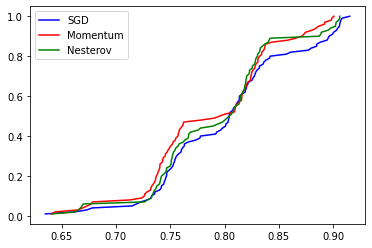

In [8]:
# for performences in [sorted(simple), sorted(momentum), sorted(nesterov)]:
performences = sorted(simple)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "blue", label="SGD")

performences = sorted(momentum)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "red", label="Momentum")

performences = sorted(nesterov)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color="green", label="Nesterov")

lab.legend()

lab.savefig("t_e_mlp_basic.pdf")